In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# **Checkpoint 01 - Modelagem de Dados e Aprendizagem de Máquina**

## **Objetivo**
Avaliar conceitos sobre Modelagem de dados e Aprendizado de Máquina (ML) adquiridos no curso.

## **Descrição do Desafio**
Você foi contratado por uma empresa que desenvolveu uma plataforma de compra e venda de carros usados. O funcionamento é bem simples, os usuários cadastram o carro que querem vender e esperam que outro usuário os compre, a empresa então fica com uma parte do valor de venda. Seu papel é desenvolver um modelo que possa determinar qual o melhor preço de venda para um usado.

Para nortear o desenvolvimento, você precisa de um ponto de partida e determinou uma pergunta chave: **Qual o preço de venda de um veículo Volkswagen Sedan 2.0 a gasolina, ano 2005, com cerca de 172095 km rodados?**

### **Orientações**
Para responder a essa pergunta, você deve utilizar o dataset da empresa, que está representado no arquivo **carros.csv**, e seguir o roteiro proposto neste desafio.

## **Exploração de Dados - 2 pontos**

1 - Carregue o dataset e faça a inspeção nas 15 primeiras linhas para identificação dos atributos. Quantos dados existem nesse dataset? Qual a quantidade de atributos? Existem valores faltantes? De que tipo são os dados? (1,0)

In [19]:
#Sua resposta aqui
# Carregue o dataset
df = pd.read_csv('./carros.csv')
display(df.head(15))

print('--------------------------------------------')

df.info()

print('--------------------------------------------')

display(df.isnull().sum())

print('--------------------------------------------')

print("Número de dados: ", len(df))

print('--------------------------------------------')

print("Número de atributos: ", len(df.columns))

print('--------------------------------------------')

print("Valores faltantes:\n", df.isnull().sum())

print('--------------------------------------------')

print("Tipos dos dados:\n", df.dtypes)

df = df.dropna(axis = 0)

,Brand,Price,Body,Mileage/1000,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.00,Petrol,yes,2011,Rav 4
5,Mercedes-Benz,199999.0,crossover,0,5.50,Petrol,yes,2016,GLS 63
6,BMW,6100.0,sedan,438,2.00,Gas,yes,1997,320
7,Audi,14200.0,vagon,200,2.70,Diesel,yes,2006,A6
8,Renault,10799.0,vagon,193,1.50,Diesel,yes,2012,Megane
9,Volkswagen,1400.0,other,212,1.80,Gas,no,1999,Golf IV


--------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage/1000  4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB
--------------------------------------------


Brand             0
Price           172
Body              0
Mileage/1000      0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

--------------------------------------------
Número de dados:  4345
--------------------------------------------
Número de atributos:  9
--------------------------------------------
Valores faltantes:
 Brand             0
Price           172
Body              0
Mileage/1000      0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64
--------------------------------------------
Tipos dos dados:
 Brand            object
Price           float64
Body             object
Mileage/1000      int64
EngineV         float64
Engine Type      object
Registration     object
Year              int64
Model            object
dtype: object


2 - Note que os dataset está no sistema americano. Converta os dados para o sistema métrico e altere o cabeçalho de forma que os dados façam sentido. (1,0)

Obs: Os dados de Milhas dividos por mil, ou seja, multiplique o valor por 1.000 para ter o valor real!

In [20]:
#Sua resposta aqui
df = df.rename(columns={
    'Brand': 'Marca',
    'Price': 'Preco',
    'Body': 'Tipo',
    'Engine Type': 'Tipo de Motor',
    'Registration': 'Registro',
    'Year': 'Ano',
    'Model': 'Modelo',
    'Mileage/1000': 'Quilometragem',
    'EngineV': 'Volume do Motor'
})
df['Quilometragem'] = (df['Quilometragem'] * 1.60934)*1000


display(df)

,Marca,Preco,Tipo,Quilometragem,Volume do Motor,Tipo de Motor,Registro,Ano,Modelo
0,BMW,4200.0,sedan,445787.18,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,687188.18,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,576143.72,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,386241.60,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,193120.80,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,56326.90,1.6,Petrol,yes,2014,Corolla
4340,Mercedes-Benz,125000.0,sedan,14484.06,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1609.34,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,312211.96,2.0,Petrol,yes,1985,520


## **Analise descritiva dos dados - 2 pontos**

3 - Faça uma análise exploratória dos dados, utilizando gráficos e tabelas para realizar correlações entre os atributos e que permitam criar um cenário de correlação entre eles.

In [21]:
log_price = np.log(df['Preco'])
df['log_Preco'] = log_price
df = df.drop('Preco',axis=1)

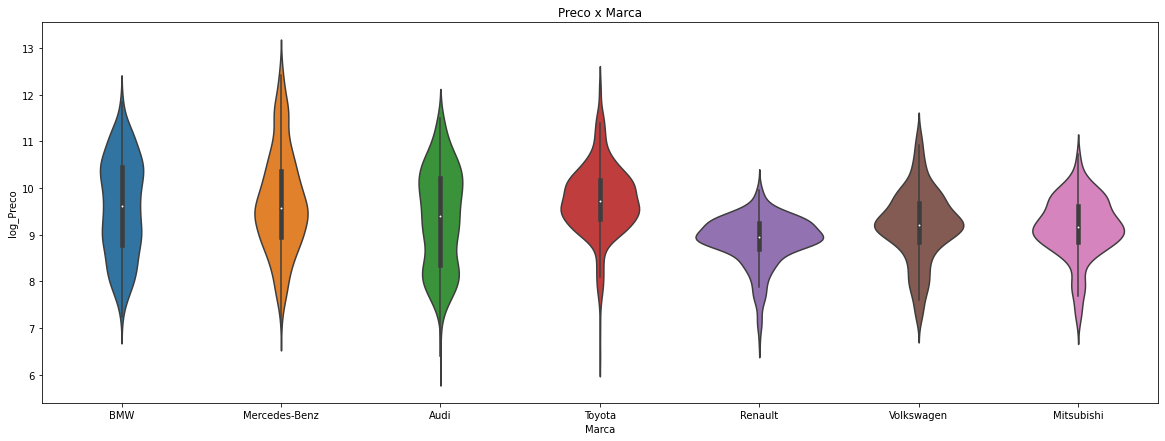

In [22]:
plt.figure(figsize=[20,7])

plt.title("Preco x Marca")
sns.violinplot(x="Marca", y="log_Preco", data=df)
plt.show()

## **Desenvolvimento do Modelo - 2 pontos**

4 - O conjunto de dados indica a aplicação de qual modelo de aprendizagem de máquina para responder a pergunta do desafio? Por quê? (1,0)

Resposta: Com base no objetivo principal do modelo, que é prever o preço de venda dos veículos, a técnica mais adequada é a regressão. Porque a regressão é uma técnica de modelagem que permite estimar a relação entre uma variável dependente, neste caso, o preço de venda, e uma ou mais variáveis independentes, as caracteristicas dos veículos.

5 - Qual a técnica sugerida para este projeto? Por quê? (1,0)

Resposta: RandomForest, já que permite capturar relações mais complexas e não lineares entre as variaveis independentes e a variavel dependente.

Com base nas suas respostas, agora escolha dois algortimos para implementar e comparar a performance de cada um deles ao final do desafio.

Resposta:

Algoritmo 1: Regressão Linear

Algoritmo 2: Random Forest

## **Treinamento e teste do Modelo - 3 pontos**

6 - Crie um subset dos dados que serão utilizados para o treinamento e para o teste do modelo. Divida este subset em treino e teste. (1,0) 

In [23]:
#Sua resposta aqui
df_dummies = pd.get_dummies(df, drop_first=True)
x = df_dummies.drop('log_Preco', axis = 1)
y = df_dummies['log_Preco']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=2, random_state=365)

7 - Faça o treinamento e teste dos 2 algoritmos escolhidos. Utilize uma métrica (ex. R2-score, RMSE e MAE...) para avaliar a performance dos modelos.

7.1 - Algoritmo 1: (0,5)


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [25]:
# Criando objeto do modelo
model_lr = LinearRegression()

# Treinando o modelo
model_lr.fit(x_train, y_train)

# Testando o modelo
y_pred_lr = model_lr.predict(x_test)

# Avaliando a performance do modelo
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print('R2-score Regressão Linear:', r2_lr)
print('RMSE Regressão Linear:', rmse_lr)


R2-score Regressão Linear: 0.985315524161963
RMSE Regressão Linear: 0.070517561914938


7.2 - Algoritmo 2:  (0,5)

In [26]:
# Criando objeto do modelo
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Treinando o modelo
model_rf.fit(x_train, y_train)

# Testando o modelo
y_pred_rf = model_rf.predict(x_test)

# Avaliando a performance do modelo
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print('R2-score Random Forest:', r2_rf)
print('RMSE Random Forest:', rmse_rf)

R2-score Random Forest: 0.9770906191400577
RMSE Random Forest: 0.0880794796257821


7.3 - Qual dos algortimos obteve melhor resultado? Por quê? (1,0)

Resposta: Regressão Linear teve um melhor resultado por conta que teve um R2-score maior e um RMSE menor, o que significa uma melhor precisão
> Indented block



## **Modelo de Produção: Teste com novos dados - 1 ponto**

8 - Use o seu modelo treinado para responder a pergunta do desafio:

In [27]:
# Converter o conjunto de dados em formato de dicionário
dict_df = df.to_dict('records')

# Adicionar uma nova linha com as informações do carro que queremos prever o preço de venda
dict_df.append({'Marca':'Volkswagen', 'Tipo': 'sedan', 'Quilometragem': 172095,'Volume do Motor': 2.0,'Tipo de Motor': 'Gas','Registro': 'yes','Ano': 2005,'Modelo': 'Polo'})

# Converter o conjunto de dados de volta para um DataFrame
new_df = pd.DataFrame(dict_df)

# Criar variáveis dummy para os valores categóricos usando a função get_dummies
new_df_dummies = pd.get_dummies(new_df, drop_first=True)

# Selecionar a nova linha adicionada e converter em formato de dicionário
nova_linha = new_df_dummies.tail(1)
nova_linha = nova_linha.to_dict('records')[0]

# Converter o dicionário em um novo DataFrame e remover a coluna log_Preco (coluna alvo)
nova_linha_df = pd.DataFrame(nova_linha, index=[0])
nova_linha_df = nova_linha_df.drop('log_Preco', axis=1)

In [28]:
# Fazer previsões para uma nova linha de dados
predicao = model_rf.predict(nova_linha_df)

preco = predicao[0]

preco = np.e**preco

In [29]:
print(f'Preço predito {preco:.2f}')

Preço predito 9129.36
